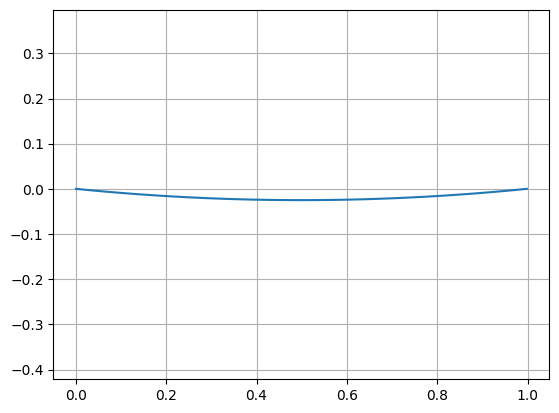

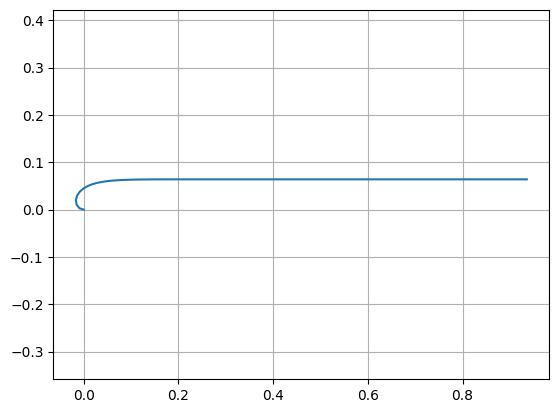

In [67]:
import numpy as np
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def convert_thetas_yx(theta, s):
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=0)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=0)

    return y, x

def beam_energy(theta, p, h, s, penalty):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    n = len(theta)
    for i in range(n):
        if i!=(n-1):
            sum1 += (theta[i+1]- theta[i])**2
        
        sum2 += np.cos(theta[i])
    
    y, x = convert_thetas_yx(theta, s)

    for yi in y:
        if yi**2 > h**2:
            sum3 += yi**2

    v = 0.5 * sum1 + p / (n+1)**2 * sum2 + penalty * sum3

    return v

n = 100
p = -1000
h = 0.05
length = 1
penalty = 0

s = np.linspace(0, length, n)
theta0 = np.linspace(-0.1, 0.1, n)

res = minimize(
    beam_energy, 
    theta0, 
    (p, h, s, penalty), 
    constraints=([
                {"type": "eq", "fun": lambda theta: theta[0]-np.pi},
                {"type": "eq", "fun": lambda theta: theta[-1]},
                ])
    )

theta = res.x

thetas = [theta0, theta]
for theta in thetas:
    y, x = convert_thetas_yx(theta, s)

    plt.plot(x, y)
    plt.grid()
    plt.axis("equal")
    plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.21819960570514
            Iterations: 191
            Function evaluations: 19686
            Gradient evaluations: 191
Energy: -23.2182
Critical buckling load: -39.48


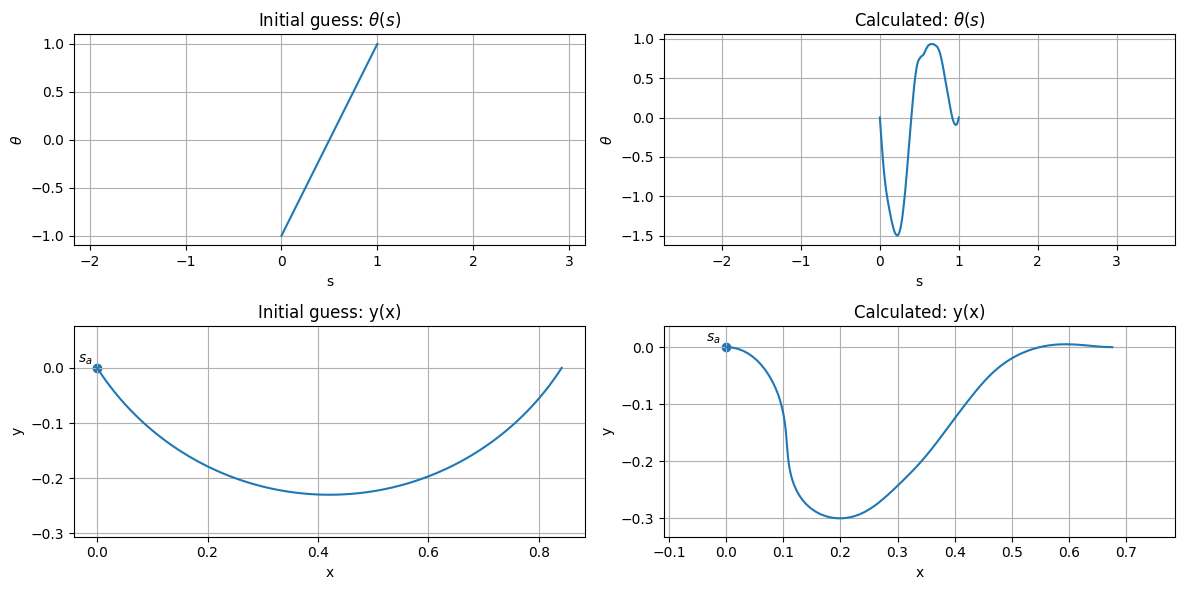

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def convert_thetas_yx(theta, s):
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=0)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=0)

    return y, x

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, 
                        ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, 
                        ax_theta=axs[0,0], ax_xy=axs[1,0], 
                        title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, 
                        ax_theta=axs[0,1], ax_xy=axs[1,1], 
                        title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()

def beam_energy(theta, h, E, I, P, s):
    n = len(theta)
    y, x = convert_thetas_yx(theta, s)
    sum1 = 0
    for i in range(n-1):
        sum1 += ( (theta[i+1] - theta[i]) / h )**2 * h

    sum2 = 0
    for i in range(n):
        sum2 += np.cos(theta[i]) * h

    sum3 = 0
    for y_i in y:
        if abs(y_i) > 0.3:
            sum3 += y_i**2

    sum4 = y[0]**2 + y[-1]**2

    V = 0.5 * E * I * sum1 + P * (1-sum2) + 1e2*sum3 + 1e6*sum4
    return V

E = 1
I = 1
P = -140
L = 1
K = 0.5
n = 100
s, h = np.linspace(0, L, n, retstep=True)
theta0 = np.linspace(-1, 1, n)

sol = minimize(
    beam_energy, 
    theta0, 
    (h, E, I, P, s), 
    constraints=({"type": "eq", "fun": lambda theta: theta[ 0]}, 
                 {"type": "eq", "fun": lambda theta: theta[-1]}),
    options={"maxiter": 200, "disp": True}
)

theta_min = sol.x

print("Energy:", round(beam_energy(sol.x, h, E, I, P, s), 6))
print("Critical buckling load:", round(-np.pi**2 * E * I / (K * L)**2, 2))
compare_xy_coordinates(s, theta0, s, theta_min)

Optimization terminated successfully.
         Current function value: 31.841802
         Iterations: 292777
         Function evaluations: 313932
Energy: 31.841802
Critical buckling load: -39.48


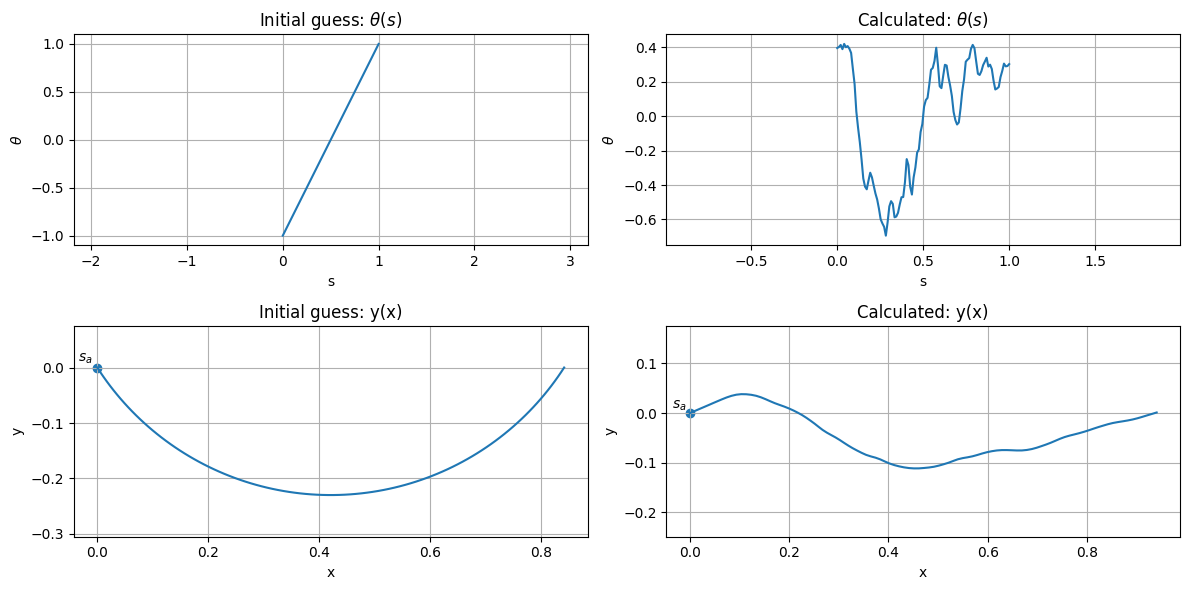

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def convert_thetas_yx(theta, s):
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=0)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=0)

    return y, x

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, 
                        ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, 
                        ax_theta=axs[0,0], ax_xy=axs[1,0], 
                        title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, 
                        ax_theta=axs[0,1], ax_xy=axs[1,1], 
                        title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()

def beam_energy(theta, h, E, I, P, s):
    n = len(theta)
    y, x = convert_thetas_yx(theta, s)
    sum1 = 0
    for i in range(n-1):
        sum1 += ( (theta[i+1] - theta[i]) / h )**2 * h

    sum2 = 0
    for i in range(n):
        sum2 += np.cos(theta[i]) * h

    sum3 = 0
    for y_i in y:
        if abs(y_i) > 0.1:
            sum3 += y_i**2

    sum4 = y[0]**2 + y[-1]**2

    V = 0.5 * E * I * sum1 + P * (1-sum2) + 1e2*sum3 + 1e5*sum4
    return V

E = 1
I = 1
P = -10
L = 1
K = 0.5
n = 100
s, h = np.linspace(0, L, n, retstep=True)
theta0 = np.linspace(-1, 1, n)

sol = minimize(
    beam_energy, 
    theta0, 
    (h, E, I, P, s), 
    options={"maxiter": 1e8, "disp": True},
    method='Nelder-Mead'
)

theta_min = sol.x

print("Energy:", round(beam_energy(sol.x, h, E, I, P, s), 6))
print("Critical buckling load:", round(-np.pi**2 * E * I / (K * L)**2, 2))
compare_xy_coordinates(s, theta0, s, theta_min)

Optimization terminated successfully.
         Current function value: -2.450740
         Iterations: 123
         Function evaluations: 13231
         Gradient evaluations: 131
Energy: -2.45074
Critical buckling load: -39.48


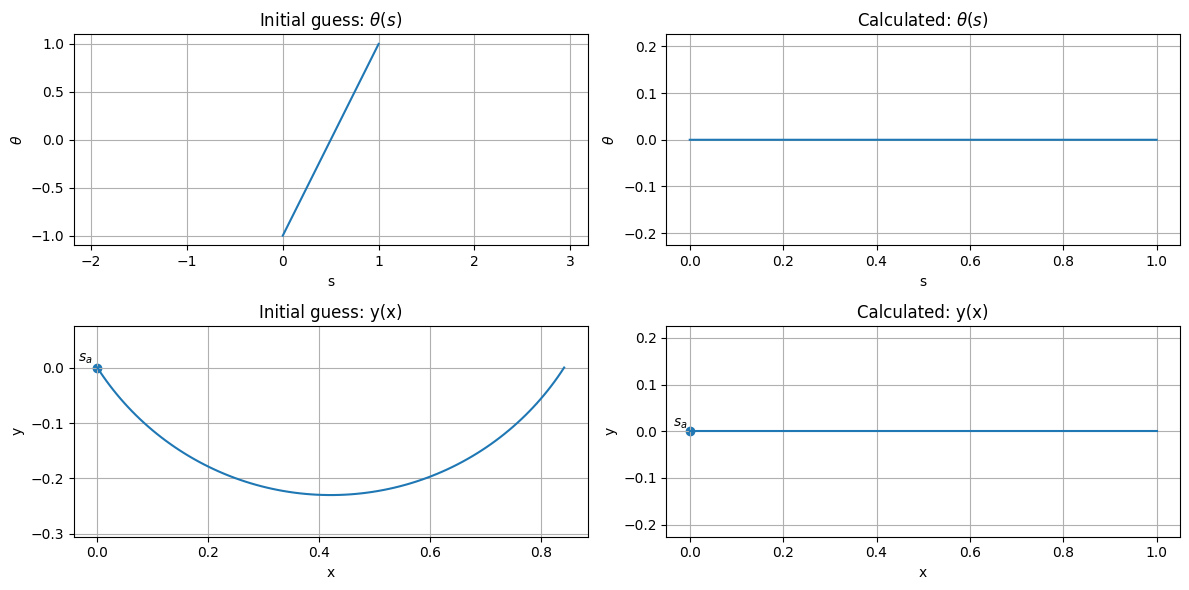

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import minimize

def convert_thetas_yx(theta, s):
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=0)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=0)

    return y, x

def compute_xy_coordinates(s, theta, x_s_a=0, y_s_a=0):
    """
    Compute x(s), y(s) from s and theta(s), starting at (x_s_a, y_s_a).
    Returns x, y.
    """
    dx_ds = np.cos(theta)
    x = cumulative_trapezoid(dx_ds, s, initial=x_s_a)

    dy_ds = np.sin(theta)
    y = cumulative_trapezoid(dy_ds, s, initial=y_s_a)

    return x, y

def plot_xy_coordinates(s, theta, x, y, x_s_a=0, y_s_a=0, 
                        ax_theta=None, ax_xy=None, title_prefix=""):
    """
    Plot theta(s) and y(x) on provided axes.
    """
    ax_theta.plot(s, theta)
    ax_theta.set_title(f"{title_prefix}$\\theta(s)$")
    ax_theta.set_ylabel("$\\theta$")
    ax_theta.set_xlabel("s")
    ax_theta.axis('equal')
    ax_theta.grid()

    ax_xy.plot(x, y)
    ax_xy.set_title(f"{title_prefix}y(x)")
    ax_xy.set_ylabel("y")
    ax_xy.set_xlabel("x")
    ax_xy.axis('equal')
    ax_xy.grid()
    ax_xy.scatter(x_s_a, y_s_a)
    ax_xy.annotate("$s_a$", (x_s_a, y_s_a), xytext=(x_s_a-0.035, y_s_a+0.01))

def compare_xy_coordinates(s1, theta1, s2, theta2, x_s_a=0, y_s_a=0):
    """
    Compute and plot two sets of (theta, x, y) side by side:
    - left: s1, theta1
    - right: s2, theta2
    """
    x1, y1 = compute_xy_coordinates(s1, theta1, x_s_a, y_s_a)
    x2, y2 = compute_xy_coordinates(s2, theta2, x_s_a, y_s_a)

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    # Left plots
    plot_xy_coordinates(s1, theta1, x1, y1, x_s_a, y_s_a, 
                        ax_theta=axs[0,0], ax_xy=axs[1,0], 
                        title_prefix="Initial guess: ")

    # Right plots
    plot_xy_coordinates(s2, theta2, x2, y2, x_s_a, y_s_a, 
                        ax_theta=axs[0,1], ax_xy=axs[1,1], 
                        title_prefix="Calculated: ")

    plt.tight_layout()
    plt.show()

def beam_energy(theta, h, E, I, P, s):
    n = len(theta)
    y, x = convert_thetas_yx(theta, s)
    sum1 = 0
    for i in range(n-1):
        sum1 += ( (theta[i+1] - theta[i]))**2

    sum2 = 0
    for i in range(n):
        sum2 += np.cos(theta[i])

    sum3 = 0
    for y_i in y:
        if abs(y_i) > 0.1:
            sum3 += y_i**2

    sum4 = y[0]**2 + y[-1]**2

    V = 0.5*sum1 + p / (n +1 )**2 * sum2 + 1e2*sum3 + 1e5*sum4
    return V

E = 1
I = 1
P = -250
L = 1
K = 0.5
n = 100
p = P*L**2 / ( E * I)
s, h = np.linspace(0, L, n, retstep=True)
theta0 = np.linspace(-1, 1, n)

sol = minimize(
    beam_energy, 
    theta0, 
    (h, E, I, P, s), 
    options={"maxiter": 200, "disp": True}
)

theta_min = sol.x

print("Energy:", round(beam_energy(sol.x, h, E, I, P, s), 6))
print("Critical buckling load:", round(-np.pi**2 * E * I / (K * L)**2, 2))
compare_xy_coordinates(s, theta0, s, theta_min)